In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/"My Drive"/dataset6.zip

In [5]:
from fastai.metrics import *

import numpy as np
np.random.seed(2)

import torch 
torch.cuda.manual_seed_all(2)

import matplotlib.pyplot as plt
plt.style.use('ggplot') 

In [6]:
path = '/content/train_images6'

In [7]:
path_test= '/content/test_images_gen6'

In [8]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.3, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
len(tfms)

2

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


ImageDataBunch;

Train: LabelList (10124 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,0,0,0
Path: /content/train_images6;

Valid: LabelList (2530 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
2,1,2,1,0
Path: /content/train_images6;

Test: LabelList (2814 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/train_images6

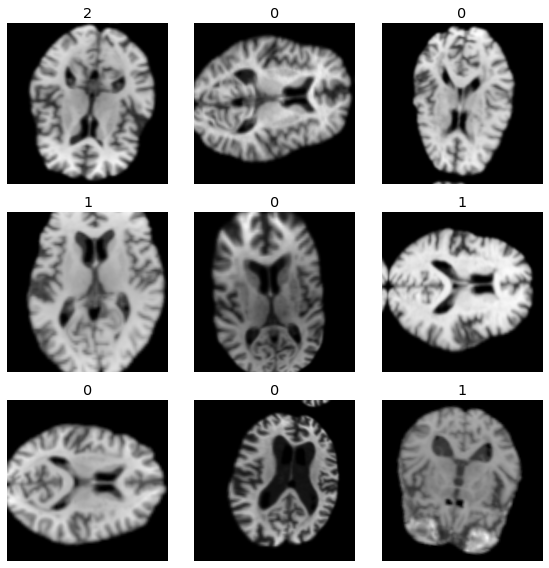

In [9]:
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, valid_pct=0.2, test = path_test, size= 256, bs=64)
data.show_batch(rows=3, figsize=(8,8))
data.normalize(imagenet_stats)

In [10]:
data.label_list

LabelLists;

Train: LabelList (10124 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,0,0,0
Path: /content/train_images6;

Valid: LabelList (2530 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
2,1,2,1,0
Path: /content/train_images6;

Test: LabelList (2814 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/train_images6

In [11]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2']


(3, 3)

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy, error_rate))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.527728,1.049364,0.531225,0.468775,03:31
1,1.083131,0.965019,0.549407,0.450593,03:25
2,1.020945,0.922592,0.569960,0.430040,03:25
3,0.962110,0.861487,0.608696,0.391304,03:25
4,0.932788,0.806221,0.643874,0.356126,03:25
5,0.884809,0.793009,0.645059,0.354941,03:25
6,0.855864,0.785728,0.653360,0.346640,03:25


In [15]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(23)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.841074,0.711850,0.687352,0.312648,04:35
1,0.769979,0.671490,0.711067,0.288933,04:32
2,0.733114,0.606564,0.758893,0.241107,04:32
3,0.705746,0.583228,0.760870,0.239130,04:32


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.841074,0.711850,0.687352,0.312648,04:35
1,0.769979,0.671490,0.711067,0.288933,04:32
2,0.733114,0.606564,0.758893,0.241107,04:32
3,0.705746,0.583228,0.760870,0.239130,04:32
4,0.702918,0.817942,0.668379,0.331621,04:32
5,0.690174,0.974829,0.629249,0.370751,04:32
6,0.653923,0.940788,0.585771,0.414229,04:32
7,0.612311,0.686944,0.733597,0.266403,04:32
8,0.544890,0.461779,0.815810,0.184190,04:32
9,0.494832,0.842194,0.711067,0.288933,04:32


In [ ]:
# learn.export("/content/gdrive/MyDrive/project_work/model_5.h5")

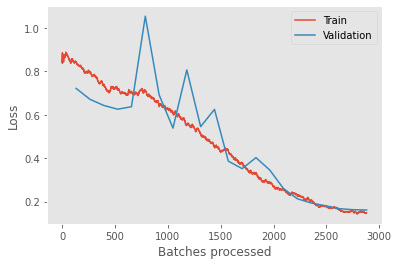

In [ ]:
learn.recorder.plot_losses()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

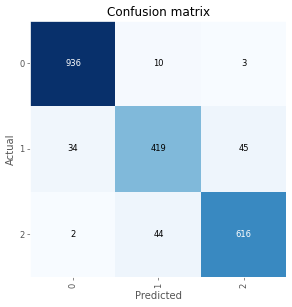

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [ ]:
preds, y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc*100))

The accuracy is 93.45661163330078 %.


In [ ]:
# list1 = torch.argmax(preds, dim=1)
# list1= preds.to_list()
# list1.to_csv('list1.csv')
# from google.colab import files
# files.download('list1.csv')

In [ ]:
import sklearn.model_selection
from sklearn.metrics import roc_curve, auc

In [ ]:
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9798754297138896


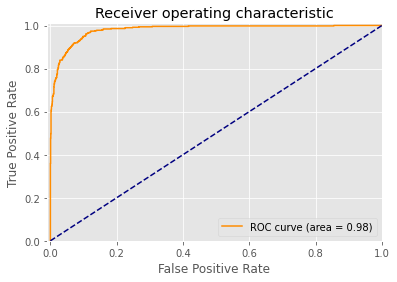

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
%%time
img = learn.data.test_ds[0][0]
learn.predict(img)

CPU times: user 59.7 ms, sys: 994 ms, total: 1.05 s
Wall time: 1.4 s


In [ ]:
# preds = learn.TTA(ds_type=DatasetType.Test)
preds, y, losses = learn.get_preds(DatasetType.Test, with_loss=True)
z = torch.argmax(preds, dim=1)

In [ ]:
%%time
v = []
j = []

for i in range(2345):
  v.append(data.test_ds.items[i])
  j.append(z[i].cpu().numpy())

CPU times: user 18.8 ms, sys: 0 ns, total: 18.8 ms
Wall time: 18.8 ms


In [ ]:
import pandas as pd
a = pd.DataFrame()
a['path'] = v
a['class'] = j
A = a['path'].astype(str).str.split("/", expand = True)
a['path'] = A.iloc[:,-1]

print(a.head())

        path class
0  282_1.png     0
1  405_1.png     0
2  250_1.png     0
3  360_0.png     0
4   50_0.png     0


In [ ]:
a.to_csv('preds_6.csv')

In [ ]:
from google.colab import files
files.download('preds_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>